<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/quadrato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 -0.74353822  1.57038657]]
Who= [[ 1.61669224 -0.50315082 

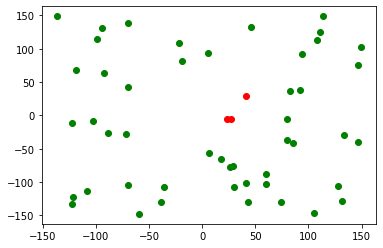

[]


In [173]:
import matplotlib.pyplot as plt
import random
import numpy as np
@np.vectorize
def generaPunti(n):
    l=[]
    for i in range(0, n+1):
        x = random.random()*300-150
        y = random.random()*300-150
        l.append([x,y])
    return l
def posizione(punto,xa,xb,ya,yb):
    if (punto[0]>xa and punto[0]<xb and punto[1]>ya and punto[1]<yb):
      formato = 'ro'
      out=1
    else:
      formato = 'go'
      out=0
    return out,formato

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

'''
Creo matrice dei pesi. Input sono 3, x1,x2 e x3 che è BIAS. Il vettore X ha dimensioni 1x3. Lo strato hidden è composto da 4 uscite, y1,y2,y3 e y4 ed è rappresentato dal vettore Y di dimensioni 4x1
Il vettore Y, di dimensioni 4x1 è il risultato del prodotto Wih.dot.X La matrice Wih ha dimensioni 4x3. Y=Wih.dot.X (4x1=4x3.dot.3x1)
L'output Z ha dimensioni 1. La matrice dei pesi da Y a Z,matrice Who,  ha dimensione 1x4. L'output Z ha dimensioni 1x1. Per questo Z=Who.dot.Y (1x1=1x4.dot.4x1)  
'''
#Creo punti Input per training. Per ogni punto aggiungo un campo che vale 1 se il punto è nel quadrato, 0 se è fuori. Nel disegno 1 è punto rosso 0 è punto verde
# defnisco contorni del quadrato
xa=-50
xb=50
ya=-50
yb=50
learning_rate=0.3
n=50
training_set=[]
ListaPunti= generaPunti(n)
for punto in ListaPunti:
   training_set.append([punto[0],punto[1],posizione(punto,xa,xb,ya,yb)[0]])
   
#print(training_set)
# Creo la matrice Wih, 4x3, i cui elementi sono i pesi. I pesi hanno un valore uniformenente distrubuito da -2 a 2
Wih=4*np.random.random((4,3))-2
Who=4*np.random.random((1,4))-2
# per vedere le dimensioni di un array in comando è :array.shape, esempio Wih.shape
# Inizializzo i valori dell'input con una lista. X=(x1,x2,x3).

###############TRAINING################################ 
for punto in training_set:
  X=(punto[0],punto[1],1)
# lo devo trasformare in un array altrimenti non posso fare operazioni vettoriali
  X=np.array(X)
  X=X.reshape(3,1)
 
#calcolo Y=Wih.dot.X
  Y=np.dot(Wih,X)
 
#calcolo Y_act che è il vettore Y a cui ho applicato la funzione di attivazione
  Y_act=activation_function(Y)
  
# Y ha dimensione 4x1
# Calcolo Z=Who.dot.Y.T
  Z=np.dot(Who,Y)
#calcolo Z_act che è il vettore Z a cui ho applicato la funzione di attivazione
  Z_act=activation_function(Z)
 
  #print("Z_act= ", Z_act, "pos_reale=", punto[2])
#calcolo l'errore finale E=valore_corretto - Z_act . Il valore corretto è la terza colonna dei punti di training, ovvero training_set[2]
  output_error=punto[2]-Z_act
 # print("Errore= ",output_error)
#Calcolo il delta da sommare al corrente valore di Y_act: moltiplicazione di learning_rate*output_errore*derivata_sigmoide in Z*valore del vettore Y_act 
# la derivata della sigmoide calcolata nel punto Z_act è: Z_act(1-Z_act)!!
  tmp=learning_rate*output_error
  tmp=tmp.reshape(1,1)
  uno_Z_act=(1-Z_act)
  Z_act_deri=np.dot(Z_act, (1-Z_act))

  Delta_Who_a=tmp*Z_act_deri*Z_act_deri
  Delta_Who=np.dot(Y_act,Delta_Who_a)
  #lo potevo anche calcolare così: Delta_Who_1=Y_act*Delta_Who_a
  #aggiorno matrice dei pesi Who
  Who=Who+Delta_Who.T
  
  #print("dim tmp=",tmp.shape,",dim Z_act=", Z_act.shape,",dim (1-Z_act)=",uno_Z_act.shape, ",dim Z_act_deri=",Z_act_deri.shape,",dim Delta_Who=",Delta_Who.shape)
  #print("Z_act=", Z_act,",(1-Z_act)=",uno_Z_act, ",Z_act_deri=",Z_act_deri,",Delta_Who=",Delta_Who)
  print("Who=", Who)

for punto in ListaPunti:
  plt.plot(punto[0],punto[1],posizione(punto,xa,xb,ya,yb)[1])
plt.show()
print(out)
